<a href="https://colab.research.google.com/github/BeverlyHuang/graduate_admissions/blob/master/Beverly_Discussion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graduate Admissions Data Exploration

### Overview

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

### Data Source

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Admit Chance ( ranging from 0 to 1 ).

Source from Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019.


https://www.kaggle.com/mohansacharya/graduate-admissions

In [0]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [0]:
grad_adm = pd.read_csv("https://raw.githubusercontent.com/BeverlyHuang/graduate_admissions/master/Admission_Predict.csv")
grad_adm.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


###Data Cleaning
Drop the Serial No. column because it has no relation to the prediction

In [0]:
grad_adm = grad_adm.drop(columns=['Serial_No.'])
grad_adm.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Distribution of Each Feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf59d7cc50>,
      dtype=object)

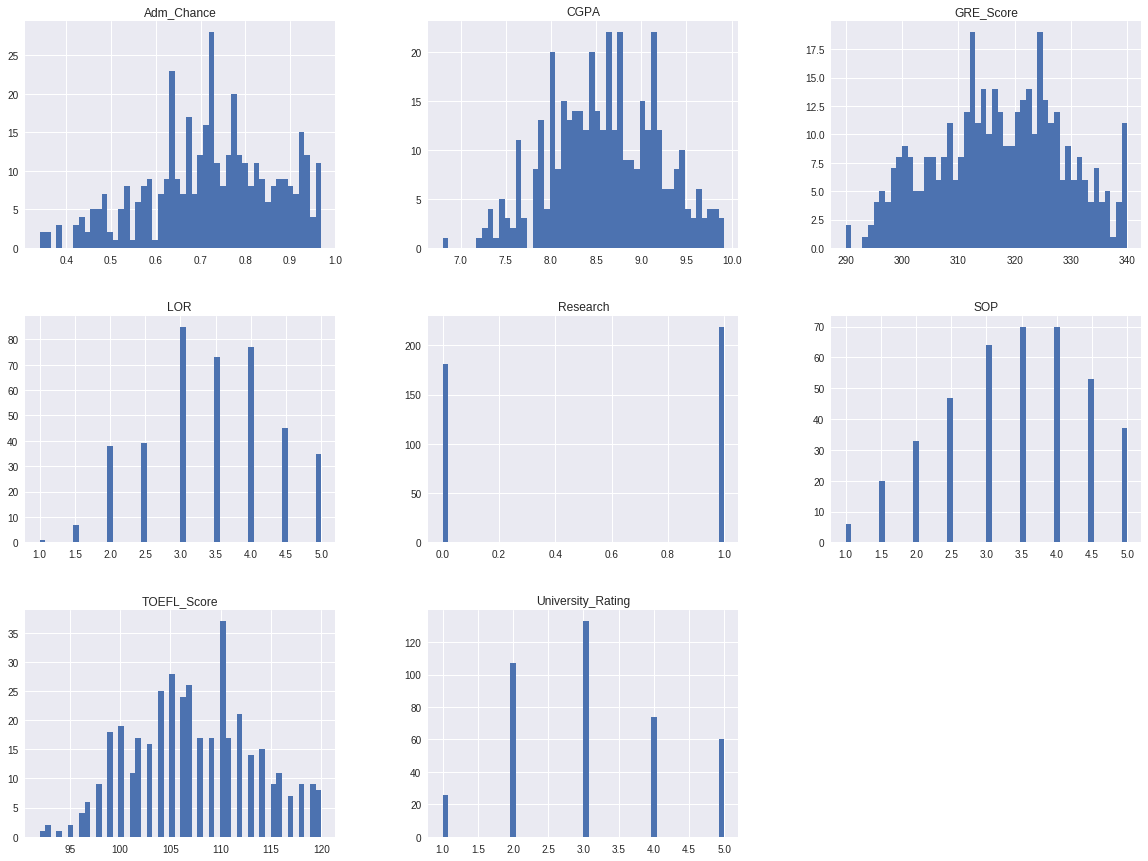

In [0]:
grad_adm.hist(bins=50, figsize=(20,15))

### Correlation between Features

This Correlation Heatmap shows that Adm_Chance is highly correlated with GRE_Score, TOEFL_Score, University_Ranking, SOP (Statement of Purpose) Strength, LOR (Letter of Recommendation) Strength, Undergraduate GPA and Research Experience.


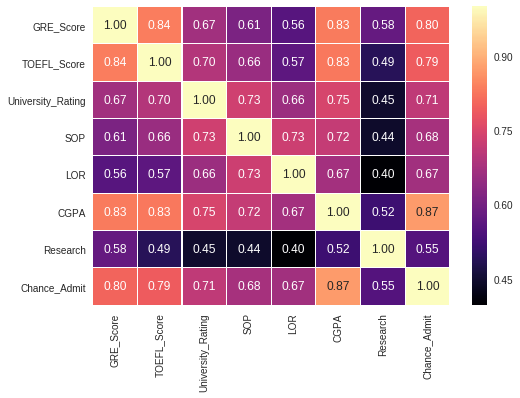

In [0]:
corr = grad_adm.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

### Use Linear Regression to Build a Model to Predict Admission Chance

A linear regression model is built to fit Adm_Chance with all other variables. This model achieves an adjusted R-squared of 80%.

In [0]:
results = smf.ols("Chance_Admit ~GRE_Score+TOEFL_Score+University_Rating+SOP+LOR+CGPA+Research", data=grad_adm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Chance_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 14 Jan 2019   Prob (F-statistic):          3.12e-134
Time:                        21:21:09   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2594      0.12

### Fit the Model with Actual Data

#### Calculated predicted chance of admissions

In [0]:
adm_pred = grad_adm.copy()
adm_pred["Predicted"] = results.predict()
adm_pred

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_Admit,Predicted
0,337,118,4,4.5,4.5,9.65,1,0.92,0.951459
1,324,107,4,4.0,4.5,8.87,1,0.76,0.805637
2,316,104,3,3.0,3.5,8.00,1,0.72,0.654737
3,322,110,3,3.5,2.5,8.67,1,0.80,0.738362
4,314,103,2,2.0,3.0,8.21,0,0.65,0.635206
5,330,115,5,4.5,3.0,9.34,1,0.90,0.865854
6,321,109,3,3.0,4.0,8.20,1,0.75,0.712986
7,308,101,2,3.0,4.0,7.90,0,0.68,0.601120
8,302,102,1,2.0,1.5,8.00,0,0.50,0.547214
9,323,108,3,3.5,3.0,8.60,0,0.45,0.712586


####Plot predicted values and actual values in one graph

This graph shows that the model predicts chance of admissions well.

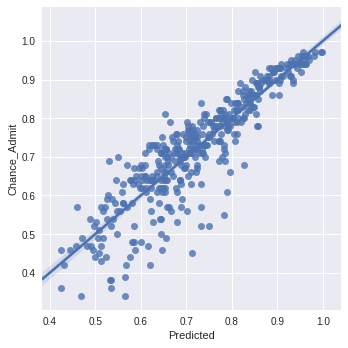

In [0]:
sns.lmplot(x="Predicted", y="Chance_Admit", data=adm_pred)